In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score

In [5]:
df=pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
df.shape

(768, 9)

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

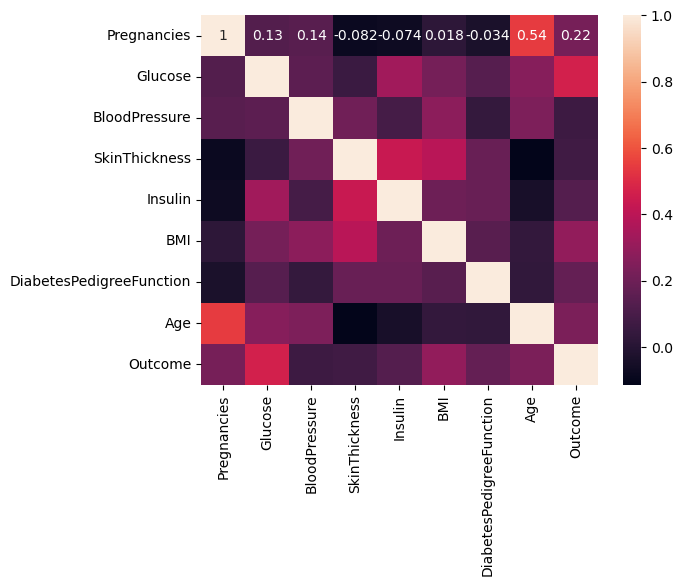

In [14]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [15]:
x=df.drop(['Outcome'],axis=1)

In [16]:
y=df['Outcome']

In [17]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [19]:
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,stratify=y,random_state=5)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [22]:
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=lr.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.7597402597402597

In [25]:
precision_score(y_test,y_pred)

0.717948717948718

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred1=dt.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred1)

0.6818181818181818

In [30]:
precision_score(y_test,y_pred1)

0.5490196078431373

In [31]:
param_grid= {'criterion':['gini','entropy'],
             'max_depth':[1,3,5,7,8]
            }
print(param_grid)                          

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 8]}


In [32]:
from sklearn.model_selection import GridSearchCV
search=GridSearchCV(estimator=dt,param_grid=param_grid,n_jobs=-1)

In [33]:
search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 8]})

In [34]:
search.best_score_

0.7735705717712915

In [35]:
search.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [36]:
# using parameter in decision tree we can get the accuracy of 76% 

In [37]:
from sklearn import svm
sv=svm.SVC(kernel='linear')

In [38]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [39]:
y_pred3=sv.predict(x_test)

In [40]:
accuracy_score(y_pred3,y_test)

0.7532467532467533

In [41]:
precision_score(y_pred3,y_test)

0.5185185185185185

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred4=rf.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred4)

0.7597402597402597

In [48]:
from xgboost import XGBClassifier

In [50]:
xgb=XGBClassifier()

In [51]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred5=xgb.predict(x_test)

In [58]:
accuracy_score(y_pred5,y_test)

0.7272727272727273

In [59]:
xgb.score(x_test,y_test)

0.7272727272727273

In [60]:
xgb.score(x_train,y_train)

1.0

In [61]:
# rf is best for this model

Making a Predictive System

In [65]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

precition=rf.predict(std_data)
if (precition==1):
    print('The person is diabetic')
else:
    print('The person is not diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
The person is diabetic


C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sagar\anaconda3\file\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
